# **PANDAS NOTEBOOK BY P.KAVIN**

**PANDAS**

Pandas library is used for working with tabular data in python. It can read input data of the form CSV, SQL, EXCEL etc..

In [1]:

from urllib.request import urlretrieve
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')


('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x799088923bb0>)

***To read CSV file we can read_csv method***

Whenever a CSV data is represented in a tabular form, the data is read from the CSV file and stored in **Dataframe object** which is a basic data structure in pandas library used to represent any data in tabular form.


In [2]:
import pandas as pd
covid_df = pd.read_csv('italy-covid-daywise.csv')
print(covid_df)

           date  new_cases  new_deaths  new_tests
0    2019-12-31        0.0         0.0        NaN
1    2020-01-01        0.0         0.0        NaN
2    2020-01-02        0.0         0.0        NaN
3    2020-01-03        0.0         0.0        NaN
4    2020-01-04        0.0         0.0        NaN
..          ...        ...         ...        ...
243  2020-08-30     1444.0         1.0    53541.0
244  2020-08-31     1365.0         4.0    42583.0
245  2020-09-01      996.0         6.0    54395.0
246  2020-09-02      975.0         8.0        NaN
247  2020-09-03     1326.0         6.0        NaN

[248 rows x 4 columns]


In [3]:
type(covid_df)

pandas.core.frame.DataFrame

**To get to know about some basic information we use .info()**

In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


**To know about the statistical information of the table like mean, standard deviation, minimum values of the table .describe() is used**

In [5]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


**To get the list of columns name we use the property of columns**

In [6]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

**To know about the number of rows and columns -> dimnesion of the matrix**

In [7]:
covid_df.shape

(248, 4)

**RETRIVING DATA FROM DATAFRAME**

To retrive data from dataframes, like a specific value from a column, **Dataframes can be thought as a dictionary of lists** where each key represents the column name while value represents the array/lists in  respective columns.

**BENEFITS OF REPRESENTING THE DATA IN THE BELOW FORMAT**

* Each columns have values of the same data types, so it efficient to store them in a single array.
* Retrieving the values for a particular row simply requires extracting the elements at a given index from each column array.
* The representation is more compact as the column names are mentioned only once, while if we were to row names as lists, they would be repeated.

In [8]:
#It can be understood like this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

**To retrieve a data from dataframes** ,

**nameofdict['keyname']**

**It can also be represented as
nameofdf['columnname']**

So the below two are **same**

In [9]:
covid_data_dict['new_cases']

[1444, 1365, 996, 975, 1326]

In [10]:
covid_df['new_cases'] #Retriving columns as series

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Each column in a DataFrame is called **Series** which is **NumPy array** which some extra methods and properties. A single column in a spreadsheet is called Series.

In [11]:
type(covid_df['new_cases'])

pandas.core.series.Series

**Similiar to arrays, series also support index notation. It returns the value when its index is inputed**

In [12]:
print(covid_df['new_cases'][247])
print(covid_df['new_cases'][243])

1326.0
1444.0


**.at is a method which is used to retrieve data from rows and columns without using index notation**

In [13]:
covid_df.at[244,'new_deaths']

4.0

In [14]:
covid_df.at[246, 'new_cases']

975.0

**Instead of using index notation [] pandas allows to use . operator for retriving column datas**

In [15]:
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

**To make a subset of dataframe, we can input a list of columns**

In [16]:
cases_df = covid_df[['date','new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


Here cases_df is passed through **reference**, it is a view of covid_df. Changing value in any of them, will modify value in both the dataframes.
**Both point to the same data in computer memory**

**To copy the whole dataframe, .copy() method is used****

In [17]:
covid_df_copy = covid_df.copy()
covid_df_copy


,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


**Here the data in covid_df_copy is different from covid_df and changing the value in any one of them will not affect the other**

**To access a specific row of data, .loc property is used**

In [18]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [19]:
covid_df.loc[245]

date          2020-09-01
new_cases          996.0
new_deaths           6.0
new_tests        54395.0
Name: 245, dtype: object

In [20]:
type(covid_df.loc[245]) #Each row that is retrieved is also a Series Object

pandas.core.series.Series

**.head(no.of values to be represented) and .tail(no.of values to be represented) denotes the first and last few values of the dataframe**

In [21]:
covid_df.head(4)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN


In [22]:
covid_df.tail(6)

,date,new_cases,new_deaths,new_tests
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


**In the initial column of new_test naN is present. Meaning, these values will be either missing or unknown**

In [23]:
covid_df.at[0, 'new_tests']

nan

In [24]:
type(covid_df.at[0, 'new_tests']) #Eventhough, their values are missing the data type will still remain to be float

numpy.float64

**The distinction between 0 and NaN is subtle but important. In this dataset, it represents that daily test numbers were not reported on specific dates.**

We can find the first index that doesn't contain a NaN value using a column's **first_valid_index method().**

In [25]:
covid_df.new_tests.first_valid_index() 

111

**To make a particular sub data frame(table) from the given data fram, this can be done**

In [26]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


**.sample method is used to generate a random sample set of values**

In [27]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
147,2020-05-26,300.0,92.0,33944.0
23,2020-01-23,0.0,0.0,NaN
100,2020-04-09,3836.0,540.0,NaN
46,2020-02-15,0.0,0.0,NaN
199,2020-07-17,230.0,20.0,28661.0
226,2020-08-13,476.0,10.0,25629.0
12,2020-01-12,0.0,0.0,NaN
92,2020-04-01,4053.0,839.0,NaN
148,2020-05-27,397.0,78.0,37299.0
153,2020-06-01,355.0,75.0,18053.0


**ANALYSING DATA FROM DATA FRAMES**

In [28]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [29]:
#What are the total number of reported cases and deaths related to Covid-19 in Italy?
total_cases = covid_df.new_cases.sum()

total_deaths = covid_df.new_deaths.sum()

print("The total number of reported cases is {} while the total number of reported deaths is {}".format(int(total_cases), int(total_deaths)))

The total number of reported cases is 271515 while the total number of reported deaths is 35497


In [30]:
# What is the overall death rate (ratio of reported deaths to reported cases)?
death_rate = total_deaths/total_cases #Or
death_rate = covid_df.new_deaths.sum()/covid_df.new_cases.sum()
print("The overall death rate in Italy is {:.2f}%".format(float(death_rate*100)))  #Rounds of to two decimal floating points
#Or

print("The overall death rate in Italy is {:.2f}".format(float(death_rate)))

The overall death rate in Italy is 13.07%
The overall death rate in Italy is 0.13


In [31]:
#What is the overall number of tests conducted? A total of 935310 tests were conducted before daily test numbers were reported.**
tests_before_reported = 935310
print("The overall number of tests conducted is {}".format(int(tests_before_reported+covid_df.new_tests.sum())))

The overall number of tests conducted is 5214766


In [32]:
#What fraction of tests returned a positive result?
total_tests = tests_before_reported+covid_df.new_tests.sum()
positive_result = total_cases/total_tests
print("{:.2f}% is the fraction of tests with positive results".format(float(positive_result*100)) )

5.21% is the fraction of tests with positive results


**QUERYING AND SORTING ROWS**

To know about the days where the number of new cases is more than 1000, we can use boolean expressions

In [33]:
high_new_cases = covid_df['new_cases'] > 1000
high_new_cases #This returns a SERIES of boolean expressions -> True and False

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

**We can use the above SERIES to make a row subset of the original dataframe of the values which are TRUE**

In [34]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [35]:
#To write the above code in a simpler form
high_new_case = covid_df[covid_df.new_cases > 1000]
high_new_case

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [36]:
high_new_case.shape 

(72, 4)

**This dataframe consists of 72 rows and 4 columns, but only the first and the last 5 datas are represented, to fix this we can do**

In [37]:
from IPython.display import display
with pd.option_context('display.max_rows', 100): # It instructs to display max no. of rows with atmost 100rows
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


**For more complex QUERIES, let's try to determine the days when the ratio of cases reported to tests conducted is higher than the overall positive_rate.**

In [38]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [39]:
positive_rate = positive_result
positive_rate

0.05206657403227681

In [40]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


**The result of mathematical operations on two different columns forms a new SERIES**

In [41]:
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

**TO ADD A NEW SERIES INTO THE ORGINAL DATAFRAME, DEFINE A NEW COLUMN NAME AND THEN ASSIGN THE MATHEMATICAL OPERATION**

In [42]:
covid_df['new_positive_rate'] = covid_df.new_cases / covid_df.new_tests
covid_df

,date,new_cases,new_deaths,new_tests,new_positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


**However, keep in mind that sometimes it takes a few days to get the results for a test, so we can't compare the number of new cases with the number of tests conducted on the same day. Any inference based on this new_positive_rate column is likely to be incorrect. It's essential to watch out for such subtle relationships that are often not conveyed within the CSV file and require some external context. It's always a good idea to read through the documentation provided with the dataset or ask for more information.**

For now, let's remove the new_positive_rate column using the drop method.

In [43]:
##Drop a particular column from a dataframe

**SORTING ROWS USING COLUMN VALUES**

Rows of the dataframe can be sorted using column values -> sort_values() of the first ten values, so we can add .head(10)

In [44]:
covid_df.sort_values('new_cases', ascending=False).head(10) #Days with most number of new_cases

,date,new_cases,new_deaths,new_tests,new_positive_rate
82,2020-03-22,6557.0,795.0,NaN,NaN
87,2020-03-27,6153.0,660.0,NaN,NaN
81,2020-03-21,5986.0,625.0,NaN,NaN
89,2020-03-29,5974.0,887.0,NaN,NaN
88,2020-03-28,5959.0,971.0,NaN,NaN
83,2020-03-23,5560.0,649.0,NaN,NaN
80,2020-03-20,5322.0,429.0,NaN,NaN
85,2020-03-25,5249.0,743.0,NaN,NaN
90,2020-03-30,5217.0,758.0,NaN,NaN
86,2020-03-26,5210.0,685.0,NaN,NaN


In [45]:
covid_df.sort_values('new_deaths', ascending=False).head(10) #Days with more no. of new_deaths

,date,new_cases,new_deaths,new_tests,new_positive_rate
88,2020-03-28,5959.0,971.0,NaN,NaN
89,2020-03-29,5974.0,887.0,NaN,NaN
92,2020-04-01,4053.0,839.0,NaN,NaN
91,2020-03-31,4050.0,810.0,NaN,NaN
82,2020-03-22,6557.0,795.0,NaN,NaN
95,2020-04-04,4585.0,764.0,NaN,NaN
94,2020-04-03,4668.0,760.0,NaN,NaN
90,2020-03-30,5217.0,758.0,NaN,NaN
85,2020-03-25,5249.0,743.0,NaN,NaN
93,2020-04-02,4782.0,727.0,NaN,NaN


In [46]:
covid_df.sort_values('new_cases', ascending=True).head(10) ## We can exclude this ascending true statement, as it always prints true statements only

,date,new_cases,new_deaths,new_tests,new_positive_rate
172,2020-06-20,-148.0,47.0,29875.0,-0.004954
0,2019-12-31,0.0,0.0,NaN,NaN
29,2020-01-29,0.0,0.0,NaN,NaN
30,2020-01-30,0.0,0.0,NaN,NaN
32,2020-02-01,0.0,0.0,NaN,NaN
33,2020-02-02,0.0,0.0,NaN,NaN
34,2020-02-03,0.0,0.0,NaN,NaN
36,2020-02-05,0.0,0.0,NaN,NaN
37,2020-02-06,0.0,0.0,NaN,NaN
38,2020-02-07,0.0,0.0,NaN,NaN


It seems like the count of new cases on Jun 20, 2020, was `-148`, a negative number! Not something we might have expected, but that's the nature of real-world data. It could be a data entry error, or the government may have issued a correction to account for miscounting in the past. Can you dig through news articles online and figure out why the number was negative?

Let's look at some days before and after Jun 20, 2020.

In [47]:
covid_df.loc[165:175]

,date,new_cases,new_deaths,new_tests,new_positive_rate
165,2020-06-13,163.0,56.0,32880.0,0.004957
166,2020-06-14,346.0,78.0,29545.0,0.011711
167,2020-06-15,338.0,44.0,17463.0,0.019355
168,2020-06-16,301.0,26.0,27762.0,0.010842
169,2020-06-17,210.0,34.0,33957.0,0.006184
170,2020-06-18,328.0,43.0,32921.0,0.009963
171,2020-06-19,331.0,66.0,28570.0,0.011586
172,2020-06-20,-148.0,47.0,29875.0,-0.004954
173,2020-06-21,264.0,49.0,24581.0,0.010740
174,2020-06-22,224.0,24.0,16152.0,0.013868


**Since, the entered value cannot be negative, it is a error while collecting data. Inorder to correct the data, we can follow these approaches**

*  Replace its value by 0
*  Replace its value by the average value of the whole column
*  Replace its value by the average value of its previous and next data
*  Discard the row entirely

In [48]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2
covid_df.loc[170:175]

,date,new_cases,new_deaths,new_tests,new_positive_rate
170,2020-06-18,328.0,43.0,32921.0,0.009963
171,2020-06-19,331.0,66.0,28570.0,0.011586
172,2020-06-20,297.5,47.0,29875.0,-0.004954
173,2020-06-21,264.0,49.0,24581.0,0.010740
174,2020-06-22,224.0,24.0,16152.0,0.013868
175,2020-06-23,221.0,23.0,23225.0,0.009516


**WORKING WITH DATES**

Pandas is used for working with dates as it can be used to analyse based on days, months and even year-wise

In [49]:
covid_df.date
#here the datatype is OBJECT

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

Pandas does not know that this a date (since the name is date), so it can be converted to **datetime** using to_datetime()

In [50]:
covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df['date']
## here the data type is DATATIME

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

Note that the data type is changed to datetime 64 .

**We can now extract different parts of the data into separate columns, using the DatetimeIndex class (view docs)**.

In [51]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [52]:
covid_df

,date,new_cases,new_deaths,new_tests,new_positive_rate,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2


**WE CAN CHECK THE TOTAL METRICS FOR MAY.**

We can query the rows for May, choose a subset of columns, and use the sum method to aggregate each selected column's values.

In [53]:
#Ouery the rows for May
covid_df_may = covid_df[covid_df.month == 5]

#Choosing subset of columns
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

#Column wise sum
covid_may_totals = covid_df_may_metrics.sum()



In [54]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [55]:
type(covid_may_totals)

pandas.core.series.Series

In [56]:
## Above code can be written in single line as
covid_may_totals = covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

Let's check if the number of cases reported on Sundays is higher than the average number of cases reported every day. This time, we might want to aggregate columns using the **.mean method.**

In [57]:
#Total Average
covid_df.new_cases.mean()

1096.6149193548388

In [58]:
#Number of new_cases in Sunday Average
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

**GROUPING AND AGGREGATION**

We can create a new dataframe with month-wise data. This is called grouping of data. We can use the groupby function to create a group for each month, select the columns we wish to aggregate, and aggregate them using the sum method.

In [59]:
covid_df

,date,new_cases,new_deaths,new_tests,new_positive_rate,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2


In [60]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


**GROUPING AND AGGREGATION**

**Grouping and aggregation** is a powerful method for progressively summarizing data into smaller data frames.

Instead of aggregating by sum, you can also aggregate by other measures like mean. Let's compute the average number of daily new cases, deaths, and tests for each month.

In [61]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,273.916667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


Apart from grouping, another form of aggregation is the running or cumulative sum of cases, tests, or death up to each row's date. We can use the `cumsum` method to compute the cumulative sum of a column as a new series. Let's add three new columns: `total_cases`, `total_deaths`, and `total_tests`.

In [62]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum() + tests_before_reported
covid_df

,date,new_cases,new_deaths,new_tests,new_positive_rate,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6,267298.5,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0,268663.5,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1,269659.5,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2,270634.5,35491.0,NaN


**MERGING DATA FROM MULTIPLE SOURCES**

To know about the other information test per million, cases per million, etc. We have to know the country's population. So we will download another csv file locations.csv which contains health-related information for many countries, including Italy

In [63]:
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')


('locations.csv', <http.client.HTTPMessage at 0x799076b33bb0>)

In [64]:
locations_df = pd.read_csv('locations.csv')
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [65]:
locations_df[locations_df.location == 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


**In order to merge two dataframes, atleast one of the column(series) should be common in both the dataframes. So we will insert the location column in covid_df**

In [66]:
covid_df['location'] = "Italy" ##Since covid_df is for Italy, we are declaring Italy for all the columns so that it can be merged with locations.csv
covid_df

,date,new_cases,new_deaths,new_tests,new_positive_rate,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6,267298.5,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0,268663.5,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1,269659.5,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


**We can now merge the dataframes with location as the common dataframe using .merge() method**

In [67]:
merged_df = covid_df.merge(locations_df, on='location')
merged_df

,date,new_cases,new_deaths,new_tests,new_positive_rate,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


**The locations for only Italy is appended(added) to each row of covid_df. If there are multiple countries present in covid_df, then the respective country's data is appended to its respective row**

**Calculating parameters like cases per million, deaths per million, tests per million**

**NOTE**

*1e6 represents that 6 zeros are present in a million so it is written as 1 to exponent power of 6*

In [68]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [69]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [70]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [71]:
merged_df

,date,new_cases,new_deaths,new_tests,new_positive_rate,year,month,day,weekday,total_cases,...,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,NaN,NaN,2019,12,31,1,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,NaN,2020,1,1,2,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,NaN,2020,1,2,3,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,NaN,2020,1,3,4,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,NaN,2020,1,4,5,0.0,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970,2020,8,30,6,267298.5,...,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,4.0,42583.0,0.032055,2020,8,31,0,268663.5,...,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,6.0,54395.0,0.018311,2020,9,1,1,269659.5,...,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,8.0,NaN,NaN,2020,9,2,2,270634.5,...,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695,586.998461,NaN


**WRITING DATA BACK TO FILES**

After manipulating data or after data analysis, the results should be written back to file. Otherwise the data will be lost. So a new dataframe consisting of the columns that we need to record for the result is created.

In [72]:
result_df = merged_df[['date', 'new_cases', 'total_cases', 'new_deaths', 'total_deaths', 'new_tests', 'total_tests', 'cases_per_million', 'deaths_per_million', 'tests_per_million']]

In [73]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,270634.5,8.0,35491.0,NaN,NaN,4476.121695,586.998461,NaN


**To convert the data from dataframe to csv, we can use to_csv() method**

In [74]:
result_df.to_csv('result.csv',index=None )

**The to_csv function also includes an additional column for storing the index of the dataframe by default. We pass index=None to turn off this behavior. You can now verify that the results.csv is created and contains data from the data frame in CSV format**

**BASIC PLOTTING WITH PANDAS**

Usually the data is plotted using **matplotlib** or **seaborn** libraries, but pandas offers a some plotting functions
.plot() method is used to plot the **column with respect to time**

Let's plot a line graph showing how the number of daily cases varies over time.

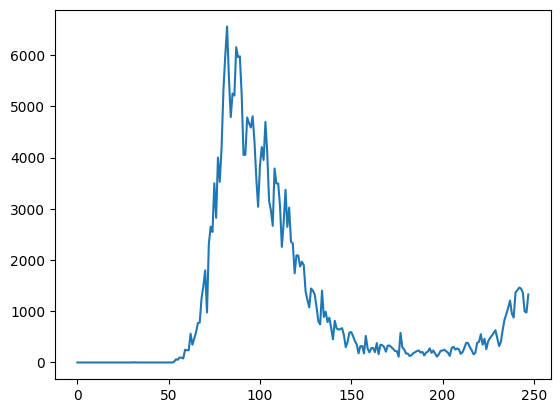

In [75]:
result_df.new_cases.plot();

**While this plot shows the overall trend, it's hard to tell where the peak occurred, as there are no dates on the X-axis. We can use the date column as the index for the data frame to address this issue.**

In [76]:
result_df.set_index('date', inplace = True)
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403


**Notice that the index of a data frame doesn't have to be numeric. Using the date as the index also allows us to get the data for a specific data using .loc.**

In [77]:
result_df.loc['2020-09-02']

new_cases                975.000000
total_cases           270634.500000
new_deaths                 8.000000
total_deaths           35491.000000
new_tests                       NaN
total_tests                     NaN
cases_per_million       4476.121695
deaths_per_million       586.998461
tests_per_million               NaN
Name: 2020-09-02 00:00:00, dtype: float64

**Let's plot the graph for new_cases and new_deaths**

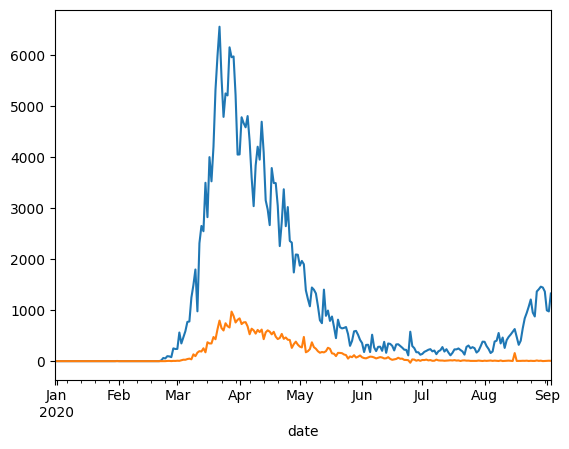

In [78]:
result_df.new_cases.plot()
result_df.new_deaths.plot();

**Compare total deaths and total cases with respect to the date**

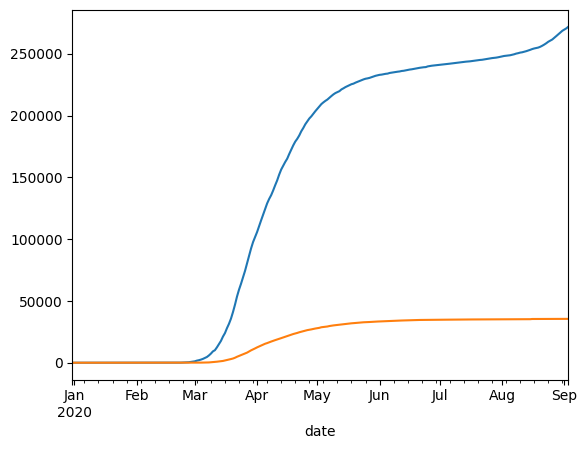

In [79]:
result_df.total_cases.plot()
result_df.total_deaths.plot();

**Represent the graphs of death and positive rates with respect to time(date) **

<Axes: title={'center': 'DEATH RATE'}, xlabel='date'>

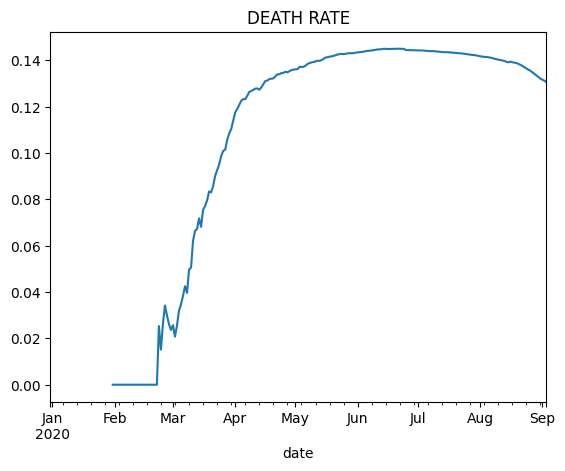

In [80]:
death_rate = result_df.total_deaths / result_df.total_cases

death_rate.plot(title = 'DEATH RATE')

<Axes: title={'center': 'POSITIVE RATE'}, xlabel='date'>

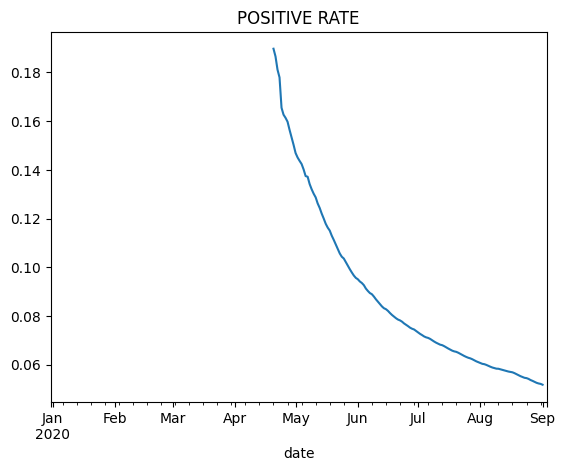

In [81]:
positive_rate = result_df.total_cases / result_df.total_tests

positive_rate.plot(title = 'POSITIVE RATE')

**PLOTTING Month wise data using bar graphs**


In [82]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


<Axes: xlabel='month'>

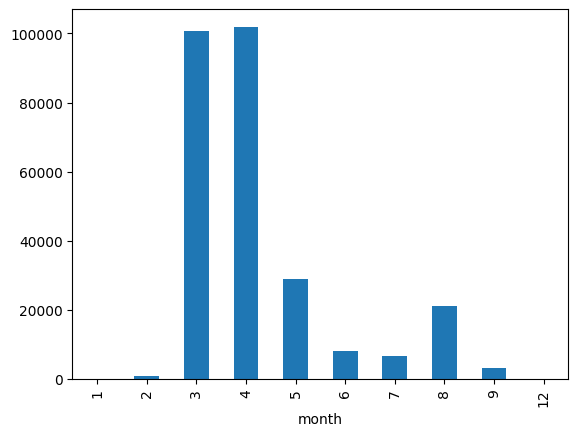

In [83]:
covid_month_df.new_cases.plot(kind = 'bar')

<Axes: ylabel='new_deaths'>

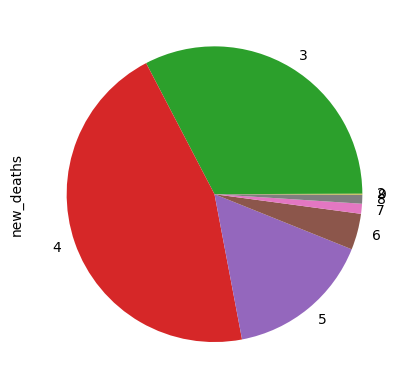

In [84]:
covid_month_df.new_deaths.plot(kind = 'pie') ##PIE CHARTS

<Axes: xlabel='month'>

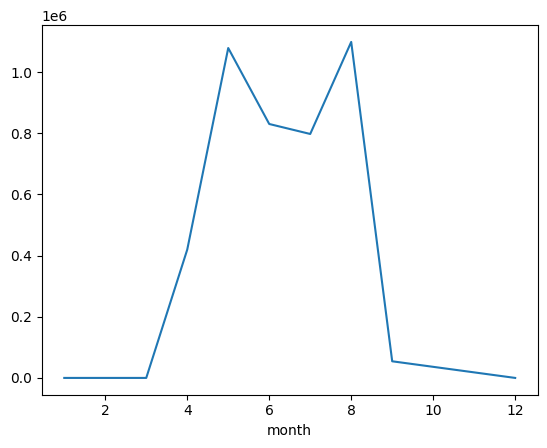

In [85]:
covid_month_df.new_tests.plot(kind = 'line')  ##LINE GRAPHS